In [254]:
# we will use logistic regression to see how different factors influence the chance of having Coronary Heart Disease (CHD)

In [255]:
import matplotlib.pyplot as plt
import pandas as pd

In [256]:
df = pd.read_csv('framingham_heart_disease.csv')
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [258]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [259]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


In [260]:
#remove current smoker because it's strongly correlated with cigsPerDay
df = df.drop(['currentSmoker'], axis=1)

In [261]:
df.corr()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
cigsPerDay,0.317930,-0.192791,0.008085,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184
sysBP,-0.035989,0.394302,-0.129631,-0.088780,0.254219,0.057009,0.696755,0.111283,0.208908,1.000000,0.784002,0.326981,0.182246,0.140621,0.216429


In [262]:
#remove null values from dataset
df.dropna(axis=0, inplace=True)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   cigsPerDay       3656 non-null   float64
 4   BPMeds           3656 non-null   float64
 5   prevalentStroke  3656 non-null   int64  
 6   prevalentHyp     3656 non-null   int64  
 7   diabetes         3656 non-null   int64  
 8   totChol          3656 non-null   float64
 9   sysBP            3656 non-null   float64
 10  diaBP            3656 non-null   float64
 11  BMI              3656 non-null   float64
 12  heartRate        3656 non-null   float64
 13  glucose          3656 non-null   float64
 14  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 457.0 KB


In [264]:
#splitting data into train and test data


X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [265]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(len(x_train))
print(len(x_test))

2924
732


In [266]:
#apply logistic regression to our train data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

fit = model.fit(x_train, y_train)

C:\Users\Philip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [267]:
#predict for test data
predicted = model.predict(x_test)

In [268]:
#see how our model handeled predicting. this is a confusion matrix
pd.crosstab(y_test, predicted)


col_0,0,1
TenYearCHD,,
0,607,6
1,113,6


In [269]:
# calculate R ^ 2
model.score(x_test, y_test)

0.837431693989071

In [270]:
# R ^ 2 = 85% is decent

In [271]:
# confusion matrix (tabela bledow I i II)
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, predicted)
cf

array([[607,   6],
       [113,   6]], dtype=int64)

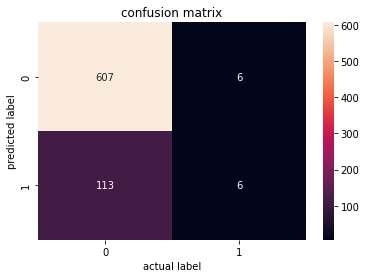

In [272]:
#present confusion matrix using seaborn
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(pd.DataFrame(cf), annot=True, fmt='g')
plt.title('confusion matrix')
plt.xlabel('actual label')
plt.ylabel('predicted label')
plt.show()

In [273]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)

print(f'Precision score is: {precision}')
print(f'Recall score is: {recall}')

Precision score is: 0.5
Recall score is: 0.05042016806722689


In [274]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       613
           1       0.50      0.05      0.09       119

    accuracy                           0.84       732
   macro avg       0.67      0.52      0.50       732
weighted avg       0.79      0.84      0.78       732



In [275]:
model.intercept_

array([-0.22320504])

In [276]:
model.coef_

array([[ 0.2080127 ,  0.03134873, -0.44299175,  0.00971592,  0.0646558 ,
         0.0220331 ,  0.55881312,  0.08846878, -0.00135039,  0.01625486,
        -0.01725207, -0.05901515, -0.0279258 ,  0.0063525 ]])